In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sn


In [ ]:
delimiter = ';'
df = pd.read_csv('sleepdata_2.csv', delimiter=delimiter)
df.head()

,Start,End,Sleep Quality,Regularity,Mood,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),City,...,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Weather temperature (°C),Weather type,Notes
0,2019-05-12 23:26:13,2019-05-13 06:11:03,60%,0%,NaN,0,8350,Normal,NaN,NaN,...,24289.2,22993.8,161.9,2019-05-13 06:00:00,2019-05-13 06:00:00,True,92.0,0.0,No weather,NaN
1,2019-05-13 22:10:31,2019-05-14 06:10:42,73%,0%,NaN,0,4746,Normal,NaN,NaN,...,28810.2,25160.9,192.1,2019-05-14 05:50:00,2019-05-14 05:50:00,True,0.0,0.0,No weather,NaN
2,2019-05-14 21:43:00,2019-05-15 06:10:41,86%,96%,NaN,0,4007,Normal,NaN,NaN,...,30461.5,28430.8,203.1,2019-05-15 05:50:00,2019-05-15 05:50:00,True,74.0,0.0,No weather,NaN
3,2019-05-15 23:11:51,2019-05-16 06:13:59,77%,92%,NaN,0,6578,Normal,NaN,NaN,...,25327.6,23132.5,168.9,2019-05-16 05:50:00,2019-05-16 05:50:00,True,0.0,0.0,No weather,NaN
4,2019-05-16 23:12:13,2019-05-17 06:20:32,78%,94%,NaN,0,4913,Normal,NaN,NaN,...,25698.4,22614.6,171.3,2019-05-17 05:50:00,2019-05-17 05:50:00,True,188.0,0.0,No weather,NaN


In [ ]:
#Seeing which column type is string so that we can change it to float
column_types = df.dtypes

# Separate columns into string and float types
string_columns = column_types[column_types == 'object']
float_columns = column_types[column_types == 'float64']

# Print the columns with string and float types
print("String columns:")
print(string_columns)
print("\nFloat columns:")
print(float_columns)

String columns:
Start            object
End              object
Sleep Quality    object
Regularity       object
Alarm mode       object
City             object
Window start     object
Window stop      object
Weather type     object
Notes            object
dtype: object

Float columns:
Mood                           float64
Air Pressure (Pa)              float64
Movements per hour             float64
Time in bed (seconds)          float64
Time asleep (seconds)          float64
Time before sleep (seconds)    float64
Snore time                     float64
Weather temperature (°C)       float64
dtype: object


In [ ]:
#Removing special characters like % sign
df['Sleep Quality'] = df['Sleep Quality'].str.replace('%', '')
df['Regularity'] = df['Regularity'].str.replace('%', '')



In [ ]:
#Converting to float
df['Regularity'] = df['Regularity'].astype(float)
df['Sleep Quality'] = df['Sleep Quality'].astype(float)



In [ ]:
# Seeing which columns have null values
columns_with_nan = df.isnull().any()
print(columns_with_nan)


Start                          False
End                            False
Sleep Quality                  False
Regularity                     False
Mood                            True
Heart rate (bpm)               False
Steps                          False
Alarm mode                     False
Air Pressure (Pa)               True
City                            True
Movements per hour             False
Time in bed (seconds)          False
Time asleep (seconds)          False
Time before sleep (seconds)    False
Window start                    True
Window stop                     True
Did snore                      False
Snore time                     False
Weather temperature (°C)       False
Weather type                   False
Notes                           True
dtype: bool


In [ ]:
#Replacing null with median
median_value = df['Air Pressure (Pa)'].median()
df['Air Pressure (Pa)'].fillna(median_value, inplace=True)

median_value2 = df['Regularity'].median()
df['Regularity'].fillna(median_value2, inplace=True)

In [ ]:
print(df['Weather type'].unique())
print(df['Alarm mode'].unique())

['No weather' 'Sunny' 'Fair' 'Partly cloudy' 'Cloudy' 'Snow' 'Fog' 'Rain'
 'Rainy showers']
['Normal' 'No alarm']


In [ ]:
#Converting weather type to float
weather_dict = {'No weather': 0, 'Sunny': 1, 'Fair': 2, 'Partly cloudy': 3, 'Cloudy': 4, 'Snow': 5, 'Fog': 6, 'Rain': 7, 'Rainy showers': 8}

df['Weather type'] = df['Weather type'].replace(weather_dict)


In [ ]:
#Converting Alarm mode to float
df['Alarm mode'] = df['Alarm mode'].str.replace('Normal', '1')
df['Alarm mode'] = df['Alarm mode'].str.replace('No alarm', '0')
df['Alarm mode'] = df['Alarm mode'].astype(float)

In [ ]:
df_input = df[['Regularity','Steps','Time in bed (seconds)','Time asleep (seconds)','Time before sleep (seconds)','Did snore','Snore time','Air Pressure (Pa)','Weather temperature (°C)','Weather type','Movements per hour','Alarm mode' ]]

In [ ]:
df_output_for_prediction = df['Sleep Quality']

In [ ]:
df['Sleep Quality'] = df['Sleep Quality'].apply(lambda x: 1 if x > 65 else 0)


df_output = df[['Sleep Quality']]
# median_value = df['Sleep Quality'].median()
# df_output['Sleep Quality'].fillna(median_value, inplace=True)
df['Sleep Quality']

0      0
1      1
2      1
3      1
4      1
      ..
916    1
917    0
918    0
919    1
920    1
Name: Sleep Quality, Length: 921, dtype: int64

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

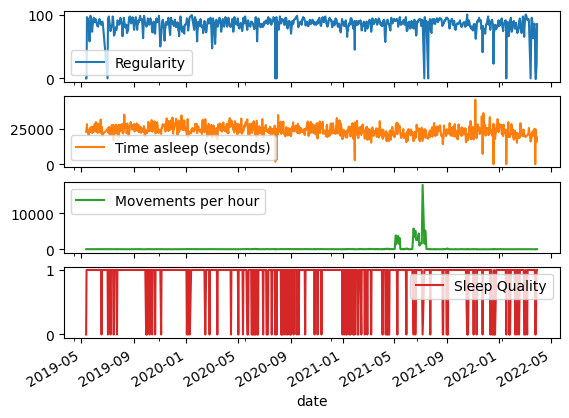

In [ ]:
df['date'] = pd.to_datetime(df['Start'],infer_datetime_format='True')
df.set_index('date')[['Regularity','Time asleep (seconds)','Movements per hour','Sleep Quality']].plot(subplots=True)
# plt.title('How different attributes and output change with time')

In [ ]:
df_input.head()

,Regularity,Steps,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Did snore,Snore time,Air Pressure (Pa),Weather temperature (°C),Weather type,Movements per hour,Alarm mode
0,0.0,8350,24289.2,22993.8,161.9,True,92.0,93.7,0.0,0,35.0,1.0
1,0.0,4746,28810.2,25160.9,192.1,True,0.0,93.7,0.0,0,78.6,1.0
2,96.0,4007,30461.5,28430.8,203.1,True,74.0,93.7,0.0,0,60.5,1.0
3,92.0,6578,25327.6,23132.5,168.9,True,0.0,93.7,0.0,0,45.2,1.0
4,94.0,4913,25698.4,22614.6,171.3,True,188.0,93.7,0.0,0,44.6,1.0


In [ ]:
# Here we are training Rfc
from sklearn.ensemble import RandomForestClassifier as rfc
x_train,x_test,y_train,y_test = train_test_split(df_input,df_output,test_size=0.25)
y_train = np.ravel(y_train)
model = rfc()
model.fit(x_train,y_train)
a = model.score(x_test,y_test)
a

0.9004329004329005

In [ ]:
# Here we are training GBC

from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)
b = gb_clf.score(x_test,y_test)

In [ ]:
#Here we are training SVM model
from sklearn.svm import SVC
model_1 = SVC()
model_1.fit(x_train,y_train)
c = model_1.score(x_test,y_test)
c

0.8917748917748918

In [ ]:
#Here we are training KNN classifier model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train)
d = knn.score(x_test,y_test)
d

0.8831168831168831

In [ ]:
#Here we are training Decision Tree classifier model
from sklearn import tree
dtmodel = tree.DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)
e = dtmodel.score(x_test,y_test)
e

0.8701298701298701

In [ ]:
#Here we are training KMeans model
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=2,n_init=2)
km_model.fit(x_train,y_train)
y_kmeans_pred = km_model.predict(x_test)

df_kmeans = pd.DataFrame(y_kmeans_pred,columns=['Predicted'])
df_kmeans['True'] = y_test
df_kmeans = df_kmeans.fillna(0)
count = 0
for i,j in zip(df_kmeans['True'],df_kmeans['Predicted']):
  if int(i-j) == 0:
    count+=1
print('Accuracy of KMeans is' , count/len(df_kmeans['True']))

Accuracy of KMeans is 0.48917748917748916


In [ ]:
#Here we are training Linear Regression Model

from sklearn.linear_model import LinearRegression as reg
model_2 = reg()

xs_train,xs_test,ys_train,ys_test = train_test_split(df_input,df_output_for_prediction,test_size=0.25)
model_2.fit(xs_train,ys_train)
ys_pred = model.predict(x_test)
f =model_2.score(xs_test,ys_test)
f

0.6120560373514179

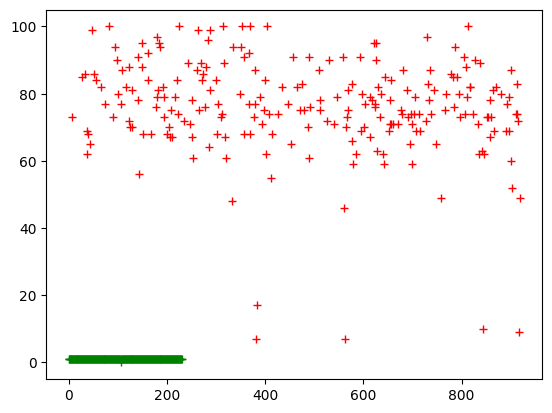

In [ ]:
plt.plot(ys_test,'r+')
plt.plot(ys_pred,'g+')
plt.show()

Text(0.5, 1.0, 'Final comparison of all algorithms')

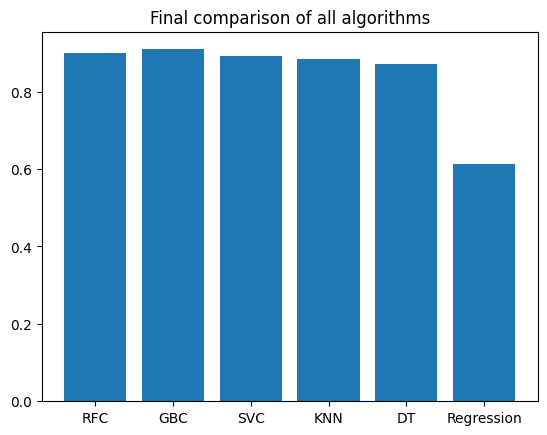

In [ ]:
names = ['RFC','GBC','SVC','KNN','DT','Regression']
height = [a,b,c,d,e,f]
plt.bar(names,height)
plt.title('Final comparison of all algorithms')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model.predict(x_test))
cm

NameError: ignored

Text(0.5, 1.0, 'Confusion matrix ')

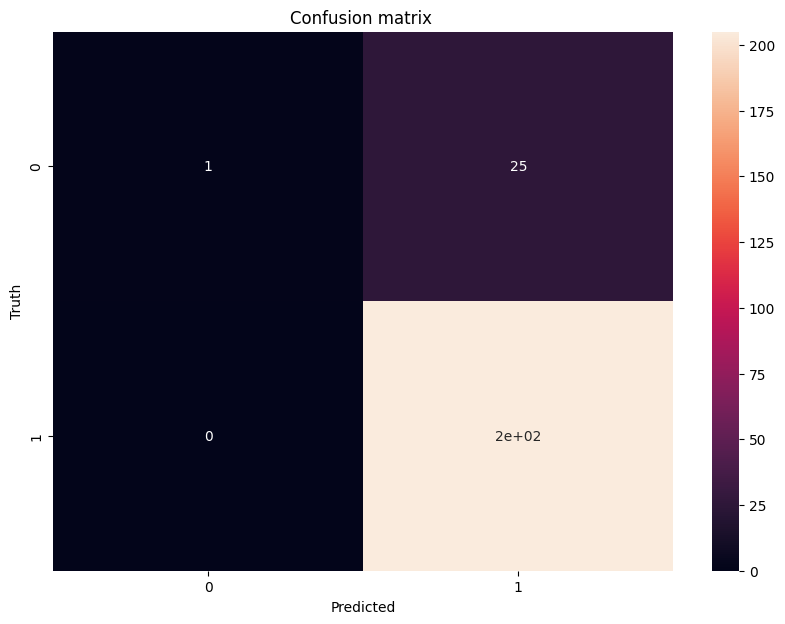

In [ ]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix for RFC ')

Text(0.5, 1.0, 'Confusion matrix for Decision Tree')

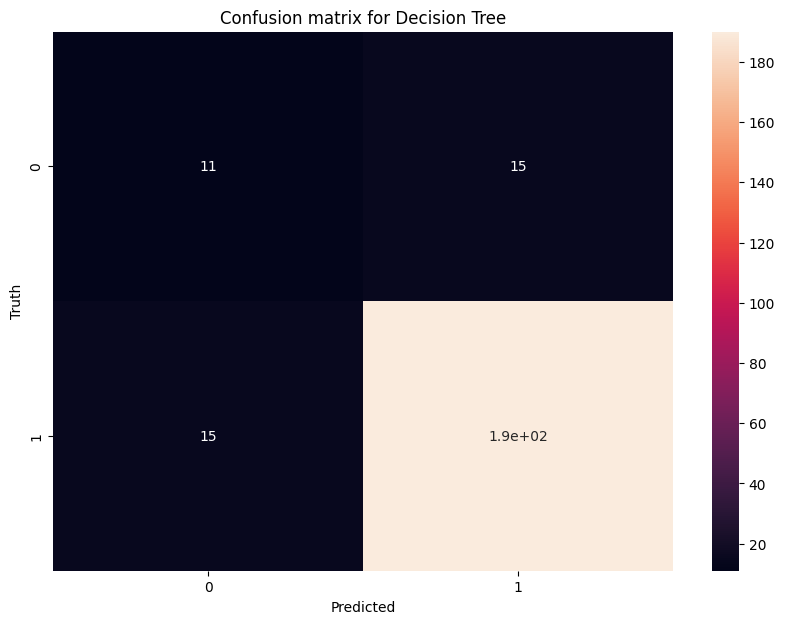

In [ ]:
cm = confusion_matrix(y_test,dtmodel.predict(x_test))
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix for Decision Tree')


Text(0.5, 1.0, 'Confusion matrix for Gradient Boosting Classifier ')

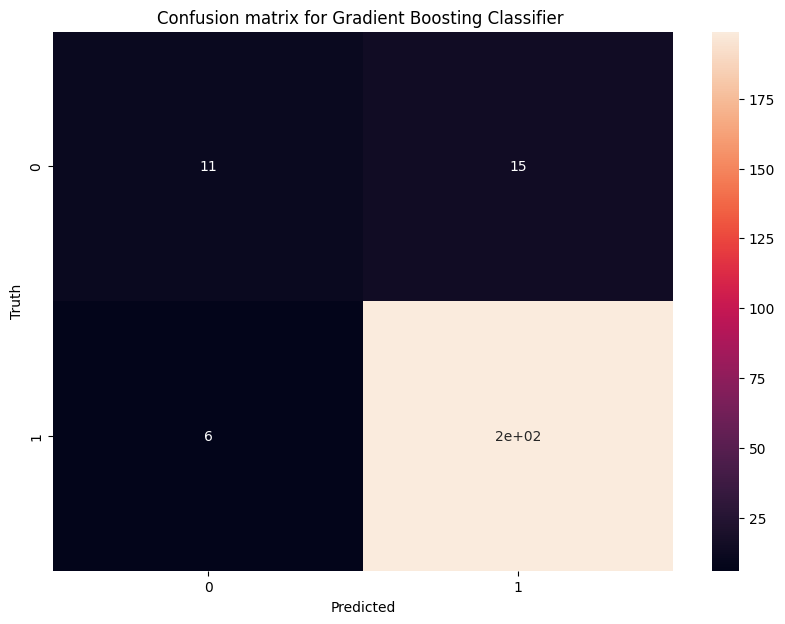

In [ ]:
cm = confusion_matrix(y_test,gb_clf.predict(x_test))
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix for Gradient Boosting Classifier ')


Text(0.5, 1.0, 'Confusion matrix for SVM')

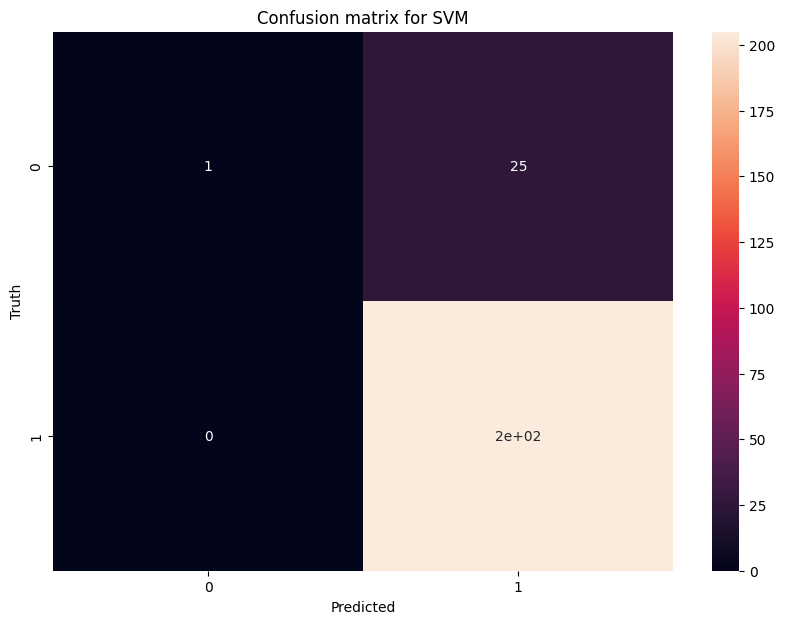

In [ ]:
cm = confusion_matrix(y_test,model_1.predict(x_test))
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix for SVM')


Text(0.5, 1.0, 'Confusion matrix for KNN ')

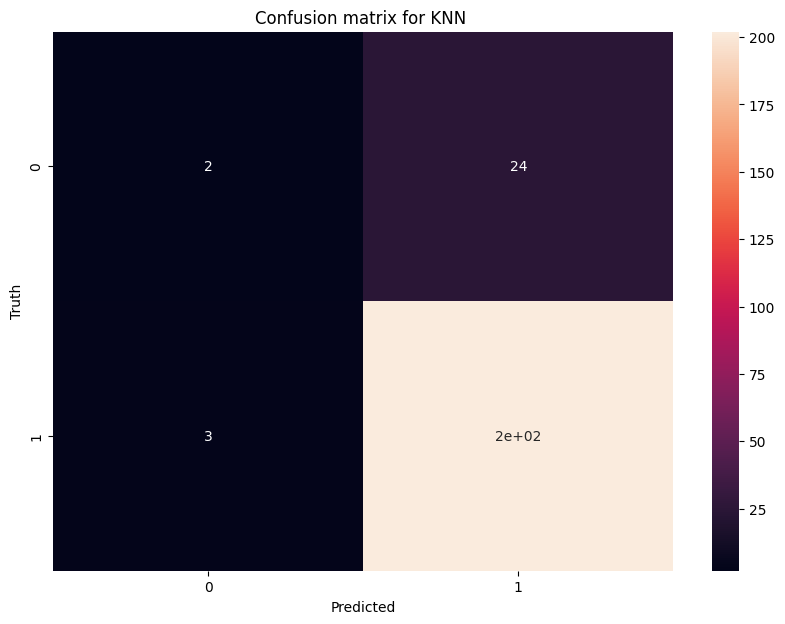

In [ ]:
cm = confusion_matrix(y_test,knn.predict(x_test))
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix for KNN ')
